In [73]:
import numpy as np
from PIL import Image
import skimage as sk
import cv2

In [74]:
%matplotlib inline 
from matplotlib import pyplot as plt

Read the original TIF files corresponding to wavenumbers of $2125 {cm}^-1, $ $2150 {cm}^-1, $ and $2190 {cm}^-1.$ The unmixed results should correspond to DNA, lipids, and proteins, respectively.

In [75]:
orig2125v1 = sk.external.tifffile.imread('846_edited.tif')
orig2125v2 = sk.external.tifffile.imread('845.6_edited.tif')
orig2150 = sk.external.tifffile.imread('844.1_edited.tif')
orig2190 = sk.external.tifffile.imread('841.1_edited.tif')

Confirm that all matrices have the same shape

In [76]:
print(orig2125v1.shape)
print(orig2125v2.shape)
print(orig2150.shape)
print(orig2190.shape)

(320, 320)
(320, 320)
(320, 320)
(320, 320)


In [77]:
import scipy
from scipy import ndimage

Because the SRS signal is linearly proportional to the power, we normalize each image by multiplying every pixel intensity value with $\frac{100}{P},$ where $P = 101$ for $2190,$ $92$ for $2150,$ $103$ for $2125v1,$ and $108$ for $2125v2.$ 

In [78]:
pow2150 = orig2150 * (100/92)
pow2125v1 = orig2125v1 * (100/103)
pow2125v2 = orig2125v2 * (100/108)
pow2190 = orig2190 * (100/101)

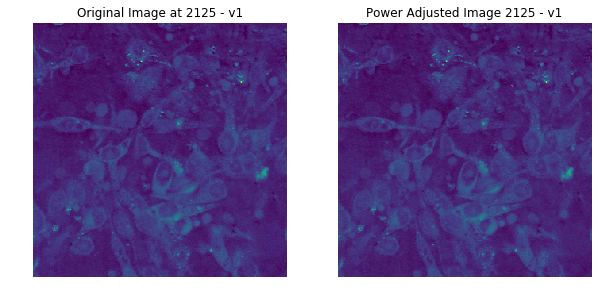

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title('Original Image at 2125 - v1')
ax[0].imshow(orig2125v1)
ax[0].set_axis_off()
ax[1].set_title('Power Adjusted Image 2125 - v1')
ax[1].imshow(pow2125v1)
ax[1].set_axis_off()
plt.show()

Concatenate the three numpy arrays into a matrix with three rows, where each column of the array corresponds to the value of a pixel in the three different TIF files. In other words, each column of the combined matrix is in the form $$\begin{bmatrix} I_{2125} \\ I_{2150} \\ I_{2190} \end{bmatrix}$$ 
where $I_{X}$ is the intensity of a single pixel for a spectrum taken at wavelength $X.$
See the end of this document for a visualization of this method on smaller arrays.

In [80]:
numRows = orig2150.shape[0];
numCols = orig2150.shape[1];

# will store a combination of all intensities into a single matrix
allCombined = np.zeros((3, numRows*numCols))

curCombined = 0; # keep track of the column number
for i in range(numRows):
    for j in range(numCols):
        allCombined[0][curCombined] = pow2125v1[i][j]
        allCombined[1][curCombined] = pow2150[i][j]
        allCombined[2][curCombined] = pow2190[i][j]
        curCombined += 1
print(allCombined)
print("Size of combined matrix: ", allCombined.shape)

[[  33.00970874   22.33009709   21.3592233  ...,   70.87378641
    76.69902913  101.94174757]
 [  75.           80.43478261   88.04347826 ...,   85.86956522
    92.39130435   96.73913043]
 [ 108.91089109   92.07920792   58.41584158 ...,   90.0990099    67.32673267
    76.23762376]]
Size of combined matrix:  (3, 102400)


Perform linear unmixing

In [81]:
trans = [[2.46, -1.33, -0.44],
         [-2.28, 0.4, 2.0],
         [-0.26, 1.81, -1.15]]

CDs = np.zeros((3, numRows*numCols))

for col in range(allCombined.shape[1]): # for each column of combined matrix
    cur = np.matmul(trans, allCombined[:,col])
    CDs[:,col] = cur
print(CDs)

[[ -66.46690858  -92.56107352  -90.25710706 ...,   20.49942847
    36.17541449   88.5691011 ]
 [ 172.55964626  165.41970753  103.35004535 ...,   52.95361288
    -3.26379932  -41.25628477]
 [   1.91995098   33.89004217   86.62707977 ...,   33.38286719
    69.86077072   60.91970439]]


In [82]:
unmixed2125v1 = np.zeros((numRows, numCols))
unmixed2150 = np.zeros((numRows, numCols))
unmixed2190 = np.zeros((numRows, numCols))

In [83]:
curIndex = 0;
for i in range(numRows):
    for j in range(numCols):
        unmixed2125v1[i][j] = CDs[0][curIndex]
        unmixed2150[i][j] = CDs[1][curIndex]
        unmixed2190[i][j] = CDs[2][curIndex]
        curIndex += 1

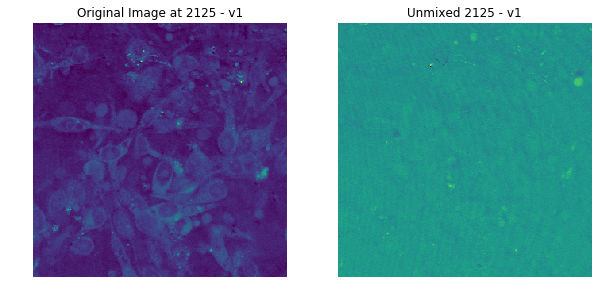

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title('Original Image at 2125 - v1')
ax[0].imshow(orig2125v1)
ax[0].set_axis_off()
ax[1].set_title('Unmixed 2125 - v1')
ax[1].imshow(unmixed2125v1)
ax[1].set_axis_off()
plt.show()

We attempt to save "unmixed2125v1" to a TIF file. Originally, we used imsave from tifffile (imsave('im2125.tif', unmixed2125v1). This resulted in an "unsupported bits per sample 64" error in FIJI. sk.external.tifffile.imsave('im2125.tif', unmixed2125v1) and sk.external.tifffile.imsave('im2125.tif', unmixed2125v1, compress=6) also resulted in the same error.

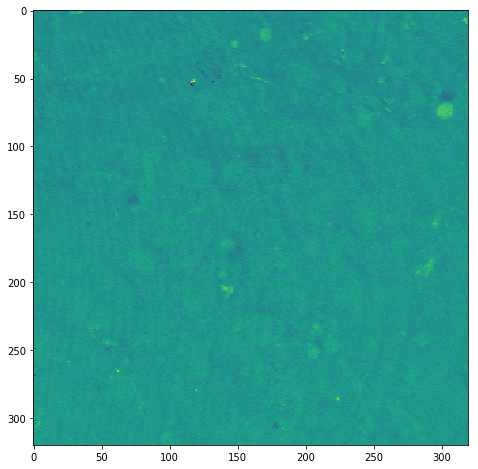

In [85]:
f = plt.figure(figsize = (8,8))
plt.imshow(unmixed2125v1)
plt.savefig('unmixed2125.png')
plt.show()

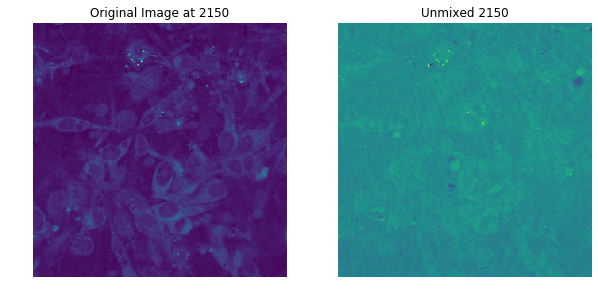

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title('Original Image at 2150')
ax[0].imshow(orig2150)
ax[0].set_axis_off()
ax[1].set_title('Unmixed 2150')
ax[1].imshow(unmixed2150)
ax[1].set_axis_off()
plt.show()

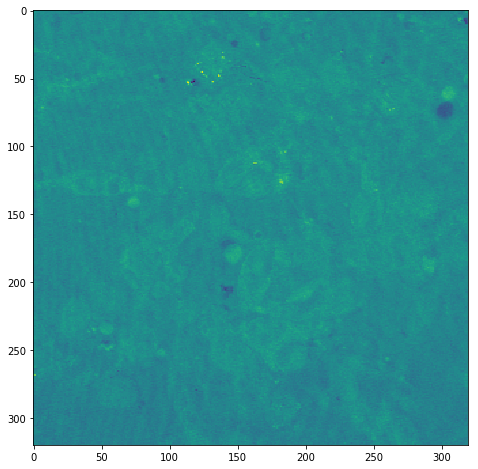

In [87]:
f = plt.figure(figsize = (8,8))
plt.imshow(unmixed2150)
plt.savefig('unmixed2150.png')
plt.show()

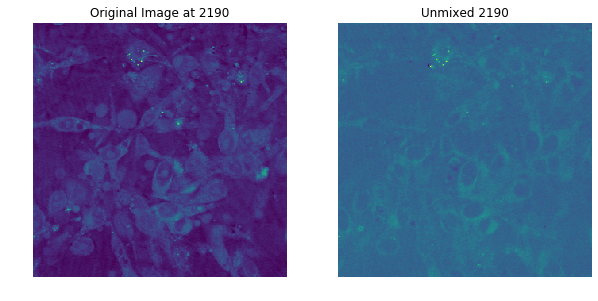

In [88]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title('Original Image at 2190')
ax[0].imshow(orig2190)
ax[0].set_axis_off()
ax[1].set_title('Unmixed 2190')
ax[1].imshow(unmixed2190)
ax[1].set_axis_off()
plt.show()

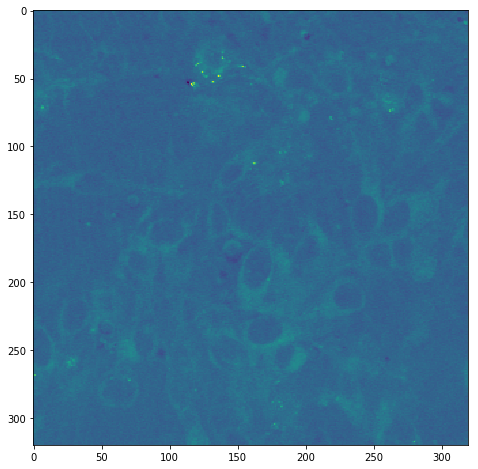

In [89]:
f = plt.figure(figsize = (8,8))
plt.imshow(unmixed2190)
plt.savefig('unmixed2190.png')
plt.show()

Now we attempt to complete the second linear unmixing procedure that's described in Figure 3e of Zhang et al.,
$$
\begin{bmatrix} CD_{L} \\ CD_{P} \\ CD_{G} \end{bmatrix} = \begin{bmatrix} 1.29 & 1.30 & -4.01 \\ 
-1.13 & 3.34 & -2.73 \\
0.69 & -4.32 & 6.88 \end{bmatrix}
\times
\begin{bmatrix} I_{2150} \\
                I_{2190} \\
                I_{2237}
\end{bmatrix}
$$  

In [90]:
orig2237 = sk.external.tifffile.imread('838_edited.tif')

Confirm that the shape is equal to that of $I_{2150}$ and $I_{2190}$

In [91]:
print(orig2237.shape)

(320, 320)


Adjust the signal intensity for imaging power (102)

In [92]:
pow2237 = orig2237 * (100/102)

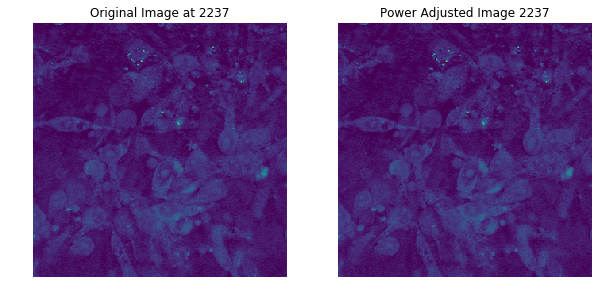

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title('Original Image at 2237')
ax[0].imshow(orig2237)
ax[0].set_axis_off()
ax[1].set_title('Power Adjusted Image 2237')
ax[1].imshow(pow2237)
ax[1].set_axis_off()
plt.show()

In [94]:
numRows = orig2150.shape[0];
numCols = orig2150.shape[1];

# will store a combination of all intensities into a single matrix
allCombined = np.zeros((3, numRows*numCols))

curCombined = 0; # keep track of the column number
for i in range(numRows):
    for j in range(numCols):
        allCombined[0][curCombined] = pow2150[i][j]
        allCombined[1][curCombined] = pow2190[i][j]
        allCombined[2][curCombined] = pow2237[i][j]
        curCombined += 1
print(allCombined)
print("Size of combined matrix: ", allCombined.shape)

[[  75.           80.43478261   88.04347826 ...,   85.86956522
    92.39130435   96.73913043]
 [ 108.91089109   92.07920792   58.41584158 ...,   90.0990099    67.32673267
    76.23762376]
 [   8.82352941   33.33333333    0.         ...,   33.33333333
    51.96078431   48.03921569]]
Size of combined matrix:  (3, 102400)


In [95]:
trans = [[1.29, 1.30, -4.01],
         [-1.13, 3.34, -2.73],
         [0.69, -4.32, 6.88]]

CDs = np.zeros((3, numRows*numCols))

for col in range(allCombined.shape[1]): # for each column of combined matrix
    cur = np.matmul(trans, allCombined[:,col])
    CDs[:,col] = cur
print(CDs)

unmixed2150 = np.zeros((numRows, numCols))
unmixed2190 = np.zeros((numRows, numCols))
unmixed2237 = np.zeros((numRows, numCols))

[[ 202.95180547   89.7971732   189.51668102 ...,   94.23378534
    -1.65321001   31.26513425]
 [ 254.92414094  125.65325011   95.61978046 ...,  112.89808437
   -21.38382796   14.17138715]
 [-358.03916715 -112.94884488 -191.60643564 ..., -100.64438944
   130.38871093   67.91326927]]


In [96]:
curIndex = 0;
for i in range(numRows):
    for j in range(numCols):
        unmixed2150[i][j] = CDs[0][curIndex]
        unmixed2190[i][j] = CDs[1][curIndex]
        unmixed2237[i][j] = CDs[2][curIndex]
        curIndex += 1

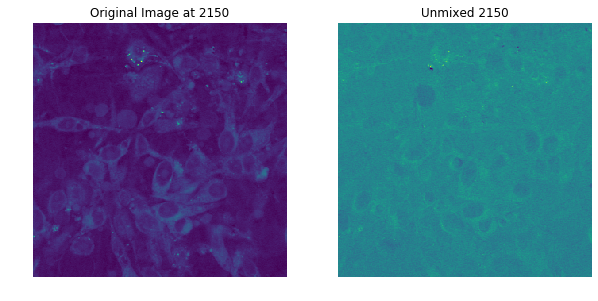

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title('Original Image at 2150')
ax[0].imshow(orig2150)
ax[0].set_axis_off()
ax[1].set_title('Unmixed 2150')
ax[1].imshow(unmixed2150)
ax[1].set_axis_off()
plt.show()

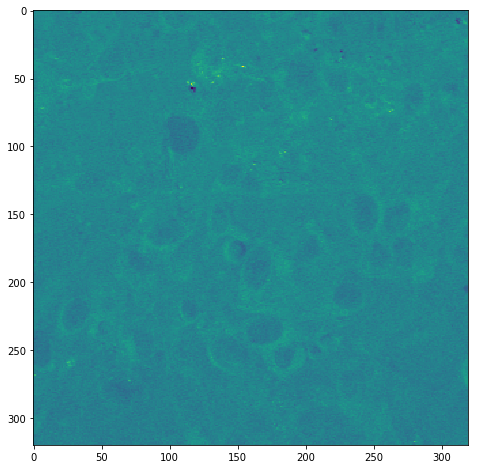

In [100]:
f = plt.figure(figsize = (8,8))
plt.imshow(unmixed2150)
plt.savefig('unmixed2150v2.png')
plt.show()

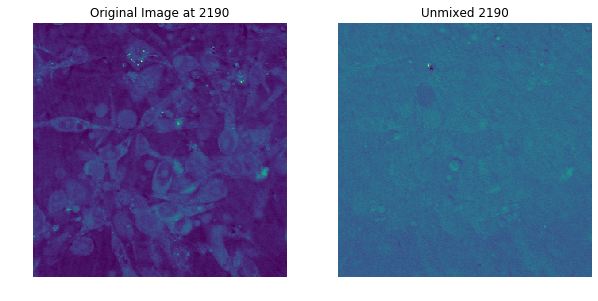

In [98]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title('Original Image at 2190')
ax[0].imshow(orig2190)
ax[0].set_axis_off()
ax[1].set_title('Unmixed 2190')
ax[1].imshow(unmixed2190)
ax[1].set_axis_off()
plt.show()

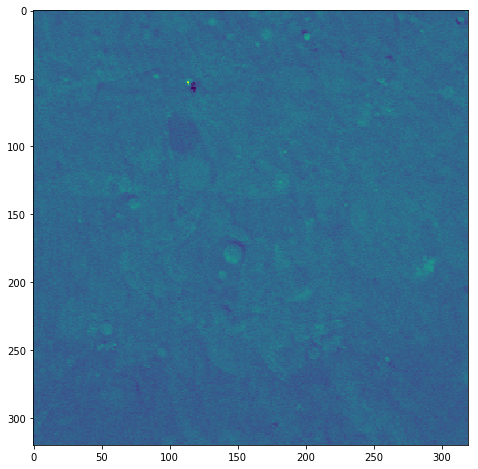

In [101]:
f = plt.figure(figsize = (8,8))
plt.imshow(unmixed2190)
plt.savefig('unmixed2190v2.png')
plt.show()

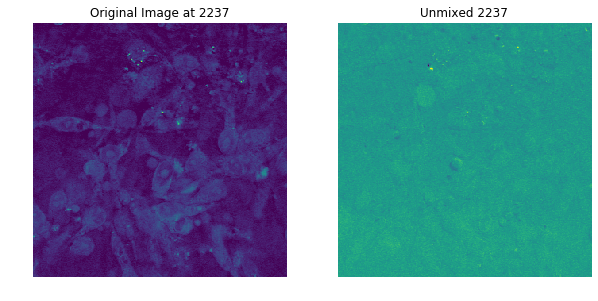

In [99]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].set_title('Original Image at 2237')
ax[0].imshow(orig2237)
ax[0].set_axis_off()
ax[1].set_title('Unmixed 2237')
ax[1].imshow(unmixed2237)
ax[1].set_axis_off()
plt.show()

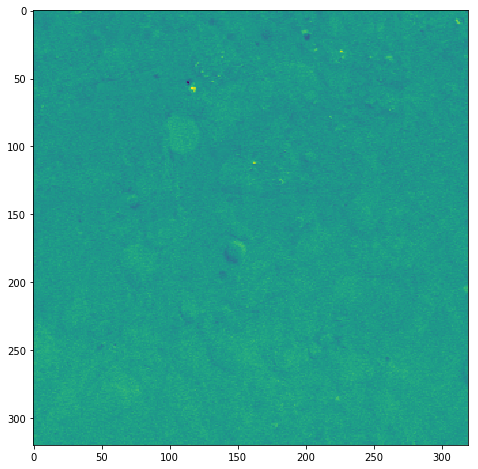

In [102]:
f = plt.figure(figsize = (8,8))
plt.imshow(unmixed2237)
plt.savefig('unmixed2237.png')
plt.show()